In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Start by locating the minima of a simple function, f(x,y) = (x-2)^2 + (y-2)^2

In [5]:


def easy_2D_grad_descent(f,x0,y0,tol=1e-3,h=1e-6,gamma=.1):
    """Gradient descent function for the easy to evaluate function given as the starting point of q3. 
    """
    
    #first, define the initial values given as x and y
    
    x = x0
    y = y0
    fs = []
    while True:
        fs.append(f(x,y))
        fprimex = (f(x=x + h,y=y ) - f(x=x,y=y )) / (h)
        fprimey = (f(x=x,y=y+h ) - f(x=x,y=y ) )/ (h)
   #     fprimez = f(x=x,y=y +h) - f(x=x,y=y ) / (h)

        xnew = x- gamma*fprimex
        ynew = y - gamma*fprimey
    #    znew = z - gamma*fprimez
      #  print('x',x)
      #  print('xnew',xnew)
        if abs(xnew-x) + abs(ynew - y)<tol: #+ abs(znew - z) < tol:
            break
        x = xnew
        y = ynew
    return x,y, fs

2.004055982121733 1.9999589353839053


Text(0.5, 1.0, '$f(x,y)$ vs. Step #')

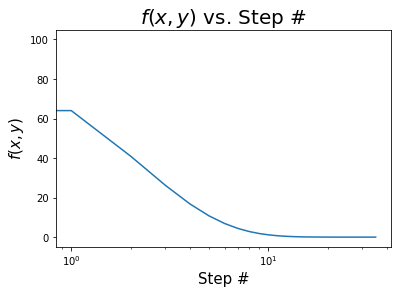

In [7]:
f = lambda x,y: (x-2)**2 + (y-2)**2
x,y,fs = easy_2D_grad_descent(f,12,1.9)
print(x,y)
plt.plot(fs)
plt.xlabel("Step #",fontsize=15)
plt.ylabel("$f(x,y)$",fontsize=15)
plt.xscale('log')
plt.title("$f(x,y)$ vs. Step #",fontsize=20)

First to validate the success of the gradient descent method, we can try and apply to an analytically solvable question, which will be the function $f(x,y) = (x-2)^2 + (y-2)^2$, with the known solution of having a global minima of x=2, and y=2.

# Part B 

Now look at the cosmos dataset. 


In [4]:
cosmos = pd.read_table("../dat/smf_cosmos.dat", sep="\s+",header=None)
cosmos.rename(columns={0:"log M_gal [dex]",1:"n(M_gal) [1/dex/Volume]",2:"error in n(M_gal)"},inplace=True)
cosmos['M_gal'] = 10**cosmos['log M_gal [dex]']

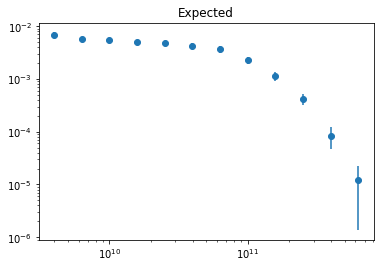

In [5]:
#plt.plot(df['log M_gal [dex]'],df['n(M_gal) [1/dex/Volume]'],'bo')
plt.errorbar(x = cosmos['M_gal'],y=(cosmos['n(M_gal) [1/dex/Volume]']),
             yerr=cosmos['error in n(M_gal)'],marker='o',ls='')
plt.title("Expected")
plt.yscale('log')
plt.xscale('log')


In [7]:
def schecter(x,phi,M,alpha):
    return phi *(x/M)**(alpha+1) * np.exp(-x/M)* np.log(10)


def chisquared(cosmos,phi,M,alpha):
   # print(cosmos)
    cosmos['Fitted Function'] = schecter(cosmos['M_gal'],phi,M,alpha) #evaluate schecter with these conditions 
    cosmos['Chi Term'] = ((cosmos['n(M_gal) [1/dex/Volume]'] - cosmos['Fitted Function'])**2) / (cosmos['n(M_gal) [1/dex/Volume]'])**2
    chisquared = sum(cosmos['Chi Term']) #this is the value to minimize
    return chisquared
    
    

In [10]:
def gradient_descent(cosmos,phi_0,M_0,alpha_0,h=1e-6,gamma=.000001,tol=1e-5):
    """
    
    Apply gradient descent to  minimize the fitting tool (chi squared in thsi case)
    of the schecter function used to characterize the number of galaxies found in the unvierse at a given mass (scaled by some characteristic mass which we 
    will find now).
    
    
    """
    
    #def
    
    alpha =  alpha_0 + 1
    M  =  M_0   + 1
    phi  =  phi_0 + 1
    
   # print(phi,M,alpha)
    while True: #for i =_0 to inf. 
        print(phi,M,alpha)

       # print(phi ,M ,alpha)
        print(chisquared(cosmos,phi,M,alpha))
        
        #what is log stepping here? 
        chiprime_phi = (chisquared(cosmos,phi ,M_0,
                                   alpha_0) - chisquared(cosmos,phi_0,M_0,
                                    alpha_0)) / (phi  - phi_0) 
        
        
        chiprime_M = (chisquared(cosmos,phi_0,M,
                                   alpha_0) - chisquared(cosmos,phi_0,M_0,
                                    alpha_0)) / (M  - M_0) 
        
        chiprime_alpha = (chisquared(cosmos,phi_0,M_0,
                                   alpha) - chisquared(cosmos,phi_0,M_0,
                                    alpha_0)) / (alpha - alpha_0) 
        
        phinew = phi  - gamma * chiprime_phi
        
        Mnew = M  - gamma * chiprime_M
        
        alphanew = alpha - gamma * chiprime_alpha #rinse and repeat, solve for alpha new after this. 
        
        print(Mnew,M)
        #  return phi,M,alpha
            
        phi_0 = phi 
        phi  = phinew
        
        M_0 = M 
        M  = Mnew  
        
        alpha_0 = alpha
        alpha = alphanew
        
        
        
gradient_descent(cosmos=cosmos,M_0=1,alpha_0=-1.1,phi_0=.002)    





1.002 2 -0.10000000000000009
12.0
2.0 2
1.002 2.0 -0.10000000000000009
12.0


ZeroDivisionError: float division by zero

In [ ]:
        
        if abs(alpha_p1 - alpha) + abs(Mnew - M ) + abs(phinew - phi ) < tol:
            break
            
        phi0 = phi 
        phi  = phinew
        M0 = M 
        M  = Mnew    
        alpha_0 = alpha
        alpha = alpha_p1
        
    return phi,M,alpha

The general gradient descent formulation should be

$a_{i+1} = a_i - \gamma * \frac{f(a_i,b_{i-1},c_{i-1}) -  f(a_{i-1},b_{i-1},c_{i-1})}{a_i - a_{i-1}}$

let a be alpha for this example

alpha_i+1 = alpha - deriv, where alpha 0 is initial param. 

alphanew = alphai+1
alpha = alphai
alpha0 = alphai-1

how to get initital alphai?


Or.....



$ \frac{d\chi}{d \phi} = $ #nah

In [ ]:
schechter_grad_descent(cosmos=cosmos,M0=1e10,alpha0=-1.1,phi0=.002)

In [ ]:
cosmos

In [ ]:
def chisquared(cosmos,phi,M,alpha):
   # print(cosmos)
    cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],phi=phi,M=M,alpha=alpha) #evaluate schecter with these conditions 
    chi_terms = ((cosmos['n(M_gal) [1/dex/Volume]'] - cosmos['Fitted Function'])**2) #/ (cosmos['n(M_gal) [1/dex/Volume]'])
    chisquared = sum(chi_terms) #this is the value to minimize
    return chisquared
    
    
def schecter(x,phi,M,alpha):
    return phi *(x/M)**(alpha+1) * np.exp(-x/M)* np.log(10)



In [ ]:
grid = pd.DataFrame(columns=['Phi','M','Alpha'])
phis = 10**np.arange(-3.2,-1,.1)
alphas = np.arange(-6,-1,.1)
ms = 10**np.arange(9,13,.1)

In [ ]:
phis

In [ ]:
X,Y,Z = np.meshgrid(phis,alphas,ms)

In [ ]:

grid['Phi'] = X.flatten()
grid['M'] = Z.flatten()
grid['Alpha'] = Y.flatten()

In [ ]:

grid['Chi Squared'] = grid.apply(lambda z: chisquared(cosmos,phi=z['Phi'],M=z['M'],alpha=z['Alpha']),axis = 1)

In [ ]:
phi = grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]['Phi'].values[0]
alpha = grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]['Alpha'].values[0]
M = grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]['M'].values[0]

In [ ]:
grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]

In [ ]:
cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],alpha=alpha,M=M,phi=phi)

In [ ]:
plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])

In [ ]:
#plt.plot(df['log M_gal [dex]'],df['n(M_gal) [1/dex/Volume]'],'bo')
plt.errorbar(x = cosmos['M_gal [dex]'],y=(cosmos['n(M_gal) [1/dex/Volume]']),
             yerr=cosmos['error in n(M_gal)'],marker='o',ls='')
plt.title("Grid Search Method")
plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])
plt.yscale('log')
plt.xscale('log')

REWRITE G DESCENT

LOG STEP SIZE, START WITH THOSE HUGE NUMBERS 

Gradient Descent here

In [ ]:
phis = np.arange(-1,2)
Ms = np.arange(10,11,.1)
alphas = np.arange(-10,-1,.1)
chimin = 1e5
for phi in phis:
    for M in Ms:
        for alpha in alphas:
            chisqua = chisquared(cosmos=cosmos,phi=phi,M=M,alpha=alpha)
            if chisqua < chimin:
                print("New Chi Min of ", chisqua)
                print("Params: ", phi,M,alpha)
                chimin = chisqua
                phimin = phi
                Mmin = M
                alphamin = alpha

In [ ]:

def schecter(x,phi,M,alpha):
    return phi * (x/M)**(alpha+1) * np.exp(-x/M) * 2.30258509299


def chisquared(cosmos,phi,M,alpha):
   # print(cosmos)
    cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],phi=phi,M=M,alpha=alpha) #evaluate schecter with these conditions 
    chi_terms = ((cosmos['n(M_gal) [1/dex/Volume]'] - cosmos['Fitted Function'])**2) / (cosmos['n(M_gal) [1/dex/Volume]'])
    chisquared = sum(chi_terms) #this is the value to minimize
    return chisquared
    
    

def schechter_grad_descent(phi0,M0,alpha0,h=1,gamma=.01,tol=1e-5):
    """
    Apply gradient descent to  minimize the fitting tool (chi squared in thsi case)
    of the schecter function used to characterize the number of galaxies found in the unvierse at a given mass (scaled by some characteristic mass which we 
    will find now).
    
    
    
    This needs to be a log step, and start around 
  
  phi 0.000794
   
   M
    1.000000e+11
    
    alpha 
    -1.5
    
    
    """
    
    
    phi = phi0
    
    M = M0
    
    alpha = alpha0
    
    
    i = 0
    chiterms = []
    phis = []
    Ms = []
    alphas = []
    while True:
        cosmos = pd.read_table("../dat/smf_cosmos.dat", sep="\s+",header=None)
        cosmos.rename(columns={0:"log M_gal [dex]",1:"n(M_gal) [1/dex/Volume]",2:"error in n(M_gal)"},inplace=True)
        cosmos['log M_gal [dex]'] = 10** cosmos['log M_gal [dex]']
        chiprime_phi = (chisquared(cosmos,phi+h,M,alpha) - chisquared(cosmos,phi,M,alpha)) / (h)
        
     #   print("Chi squared: ")
     #   print(chisquared(cosmos,phi,M,alpha))
     #   print("Chisquared + h" )
     #   print(chisquared(cosmos,phi+h,M,alpha))
        phinew = phi - gamma * chiprime_phi

        chiprime_M = (chisquared(cosmos,phi,M+h,alpha) - chisquared(cosmos,phi,M,alpha)) / (h)
        Mnew = M - gamma * chiprime_M
        
        chiprime_alpha = (chisquared(cosmos,phi,M,alpha+h) - chisquared(cosmos,phi,M,alpha)) / (h)
        
        alphanew = alpha - gamma * chiprime_alpha
      #  print("starting vals: ")
      #  print(phi,M,alpha)
      #  print("Derivatives: ")
      #  print(chiprime_phi,chiprime_M,chiprime_alpha)
       # print("Grad descent vals: ")
      #  print(phinew,Mnew,alphanew)
        if abs(chisquared(cosmos,phi,M,alpha) - chisquared(cosmos,phinew,Mnew,alphanew)) < tol:
            print("Best vals: ", phi,M,alpha)
            break
        
        phi = phinew
        M = Mnew
        alpha = alphanew
        chiterms.append(chisquared(cosmos,phi,M,alpha))
        print(chisquared(cosmos,phi,M,alpha))
        phis.append(phi)
        Ms.append(M)
        alphas.append(alpha)
        i+=1
        
        
    return chiterms,phis,Ms,alphas,i

In [ ]:
cosmos['log M_gal [dex]']

In [ ]:
chiterms,phis,Ms,alphas,i = schechter_grad_descent(8,10.5,1,gamma=.5,tol=1e-2)

In [ ]:
plt.plot(range(i),chiterms)

In [ ]:
plt.plot(range(i),phis)

In [ ]:
plt.plot(range(i),Ms)

In [ ]:
plt.plot(range(i),alphas)

In [ ]:
cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],alpha=-11,M=5,phi=8)

In [ ]:
plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])

In [ ]:
#plt.plot(df['log M_gal [dex]'],df['n(M_gal) [1/dex/Volume]'],'bo')
plt.errorbar(x = cosmos['log M_gal [dex]'],y=np.log10(cosmos['n(M_gal) [1/dex/Volume]']),
             yerr=cosmos['error in n(M_gal)'],marker='o',ls='')

plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])


Now we try to fit the schecter function!